In [ ]:
Title of ML Project: health
Name: binoy.p
Organization: Entri Elevate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
data= pd.read_csv("healthcare_dataset.csv")
print(data.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [50]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  int64  
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  int64  
 3   Blood Type          55500 non-null  int64  
 4   Medical Condition   55500 non-null  int64  
 5   Date of Admission   55500 non-null  int64  
 6   Doctor              55500 non-null  int64  
 7   Hospital            55500 non-null  int64  
 8   Insurance Provider  55500 non-null  int64  
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  int64  
 12  Discharge Date      55500 non-null  int64  
 13  Medication          55500 non-null  int64  
 14  Test Results        55500 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 6.4 MB


In [52]:
data.describe()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000
mean,25000.456847,51.539459,0.500432,3.492595,2.498847,908.043315,20194.877604,19656.653892,2.009351,25539.316097,301.134829,0.998577,922.552324,1.998054,0.998018
std,14429.751564,19.602454,0.500004,2.289700,1.708336,528.651334,11531.448639,11111.199156,1.410144,14211.454431,115.243069,0.819048,528.706026,1.413244,0.818089
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2008.492140,101.000000,0.000000,0.000000,0.000000,0.000000
25%,12508.750000,35.000000,0.000000,1.000000,1.000000,447.000000,10151.750000,10608.000000,1.000000,13241.224652,202.000000,0.000000,461.000000,1.000000,0.000000
50%,25010.500000,52.000000,1.000000,3.000000,3.000000,908.000000,20050.500000,18950.500000,2.000000,25538.069376,302.000000,1.000000,923.000000,2.000000,1.000000
75%,37476.250000,68.000000,1.000000,5.000000,4.000000,1367.000000,30111.250000,29099.250000,3.000000,37820.508436,401.000000,2.000000,1381.000000,3.000000,2.000000
max,49991.000000,89.000000,1.000000,7.000000,5.000000,1826.000000,40340.000000,39875.000000,4.000000,52764.276736,500.000000,2.000000,1855.000000,4.000000,2.000000


In [53]:
#Data Preprocessing - Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [54]:
num_data = data.select_dtypes(include="number")
num_data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,32416,42,0,6,1,466,20003,15553,1,2650.714952,417,0,495,4,0
55496,13686,61,0,3,5,260,37149,31722,2,31457.797307,316,0,268,0,2
55497,8742,38,0,4,4,432,18550,37408,4,27620.764717,347,2,459,1,0
55498,9759,43,1,7,0,17,22665,14329,3,32451.092358,321,0,22,1,0


Text(0.5, 1.0, 'Boxplot of Room Number')

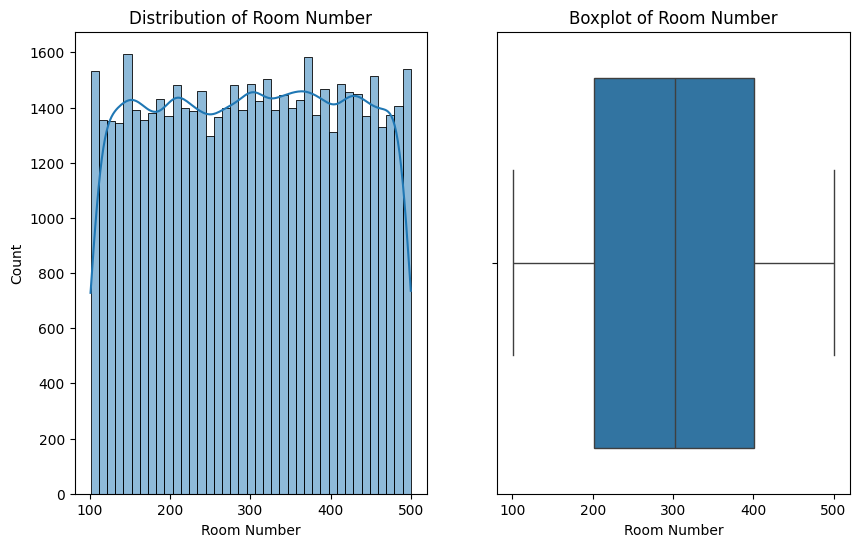

In [63]:
#Histplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)  
sns.histplot(data[column],kde=True)
plt.title(f"Distribution of {column}")
#Boxplot
plt.subplot(1,2,2)
sns.boxplot(data[column],orient="h")
plt.title(f"Boxplot of {column}")

In [55]:
num_data.skew()

Name                  0.000760
Age                  -0.005735
Gender               -0.001730
Blood Type            0.003384
Medical Condition    -0.001557
Date of Admission     0.012202
Doctor               -0.003734
Hospital              0.045628
Insurance Provider   -0.008387
Billing Amount       -0.000978
Room Number          -0.011200
Admission Type        0.002623
Discharge Date        0.012666
Medication            0.002446
Test Results          0.003648
dtype: float64

In [86]:
data.dropna(axis=0, inplace=True)

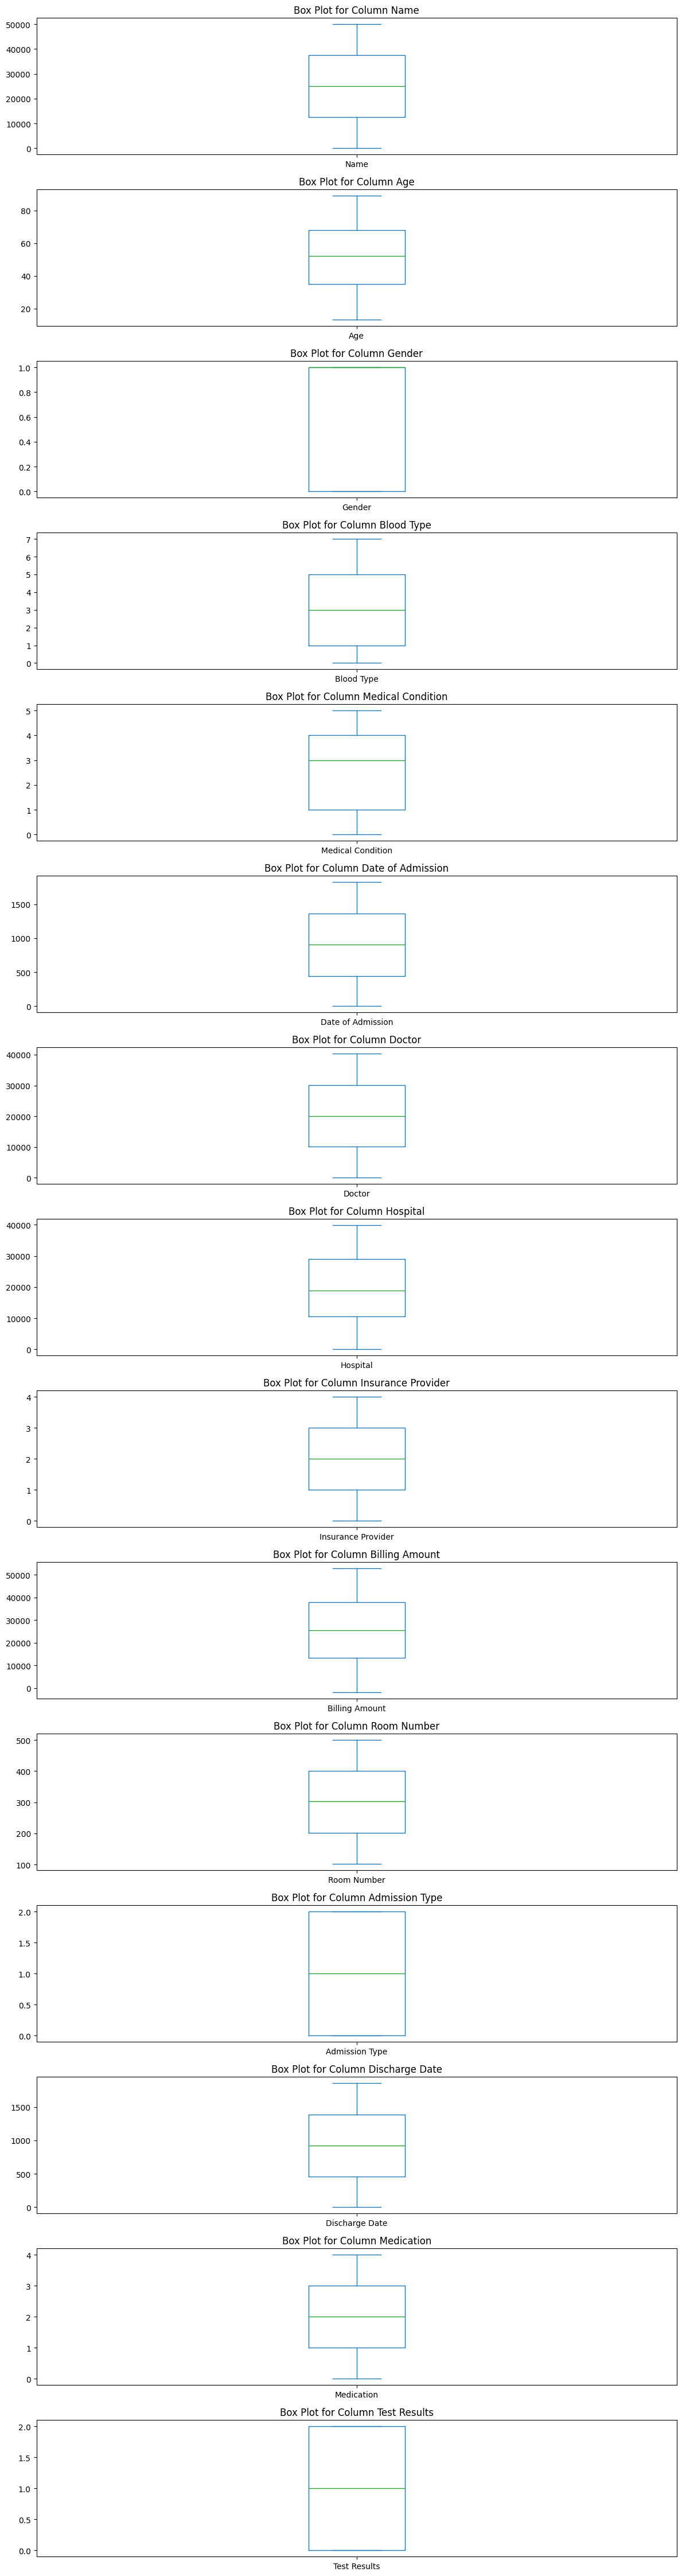

In [87]:
# Create a figure with subplots for each column
fig, axes = plt.subplots(len(data.columns), 1, figsize=(12, 3*len(data.columns)))

# Iterate over each column and create a box plot
for i, ax in enumerate(axes):
    data.iloc[:, i].plot(kind='box', ax=ax)
    ax.set_title(f"Box Plot for Column {data.columns[i]}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [91]:
# Check for skewness in numerical features
skewness = data[numeric_cols].skew()
print("Skewness before transformation:")
print(skewness)

# Apply log transformation to highly skewed features
for column in numeric_cols:
    if abs(skewness[column]) > 1:  
        data[column] = np.log1p(data[column])  
# Check skewness after transformation
skewness_after = data[numeric_cols].skew()
print("Skewness after transformation:")
print(skewness_after)

Skewness before transformation:
Name                  0.000760
Age                  -0.005735
Gender               -0.001730
Blood Type            0.003384
Medical Condition    -0.001557
Date of Admission     0.012202
Doctor               -0.003734
Hospital              0.045628
Insurance Provider   -0.008387
Billing Amount       -0.000978
Room Number          -0.011200
Admission Type        0.002623
Discharge Date        0.012666
Medication            0.002446
Test Results          0.003648
dtype: float64
Skewness after transformation:
Name                  0.000760
Age                  -0.005735
Gender               -0.001730
Blood Type            0.003384
Medical Condition    -0.001557
Date of Admission     0.012202
Doctor               -0.003734
Hospital              0.045628
Insurance Provider   -0.008387
Billing Amount       -0.000978
Room Number          -0.011200
Admission Type        0.002623
Discharge Date        0.012666
Medication            0.002446
Test Results          0

In [57]:
numeric_columns_iqr = data.select_dtypes(include=[np.number]).columns
numeric_columns_iqr

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

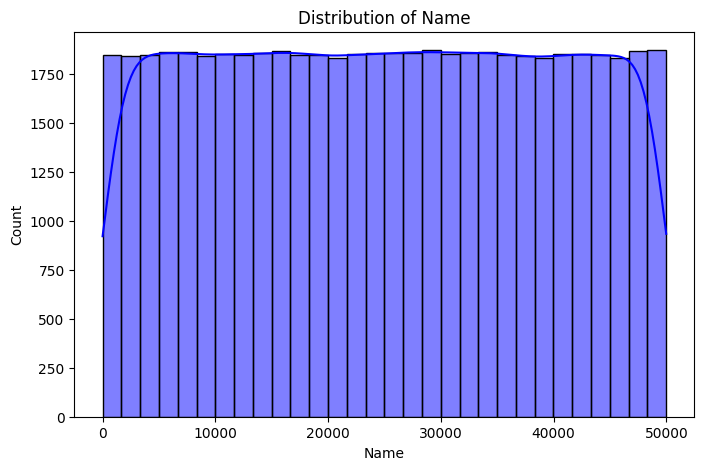

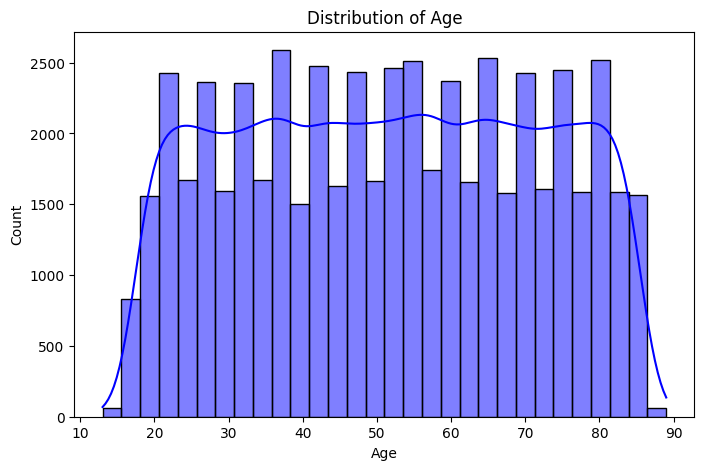

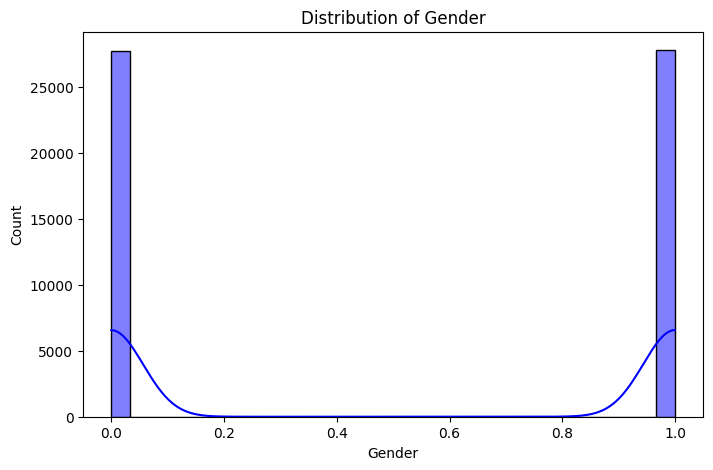

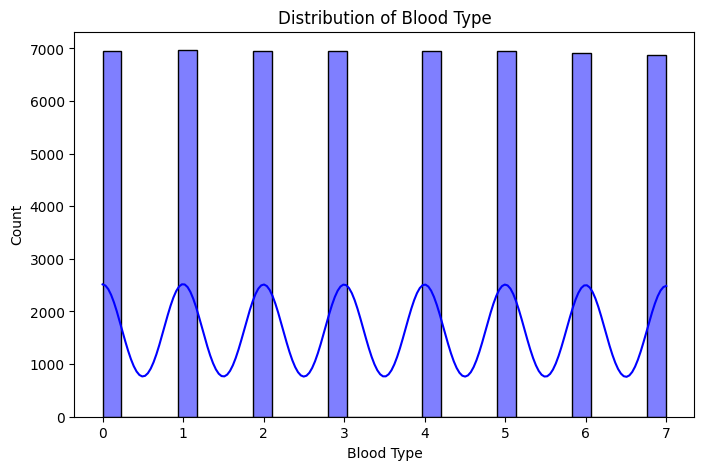

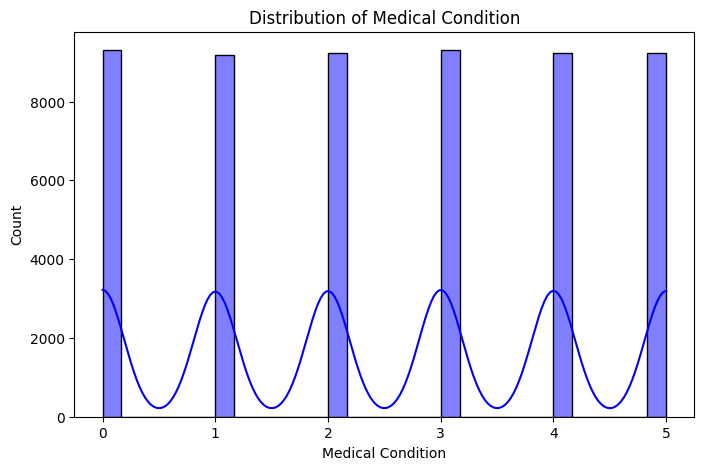

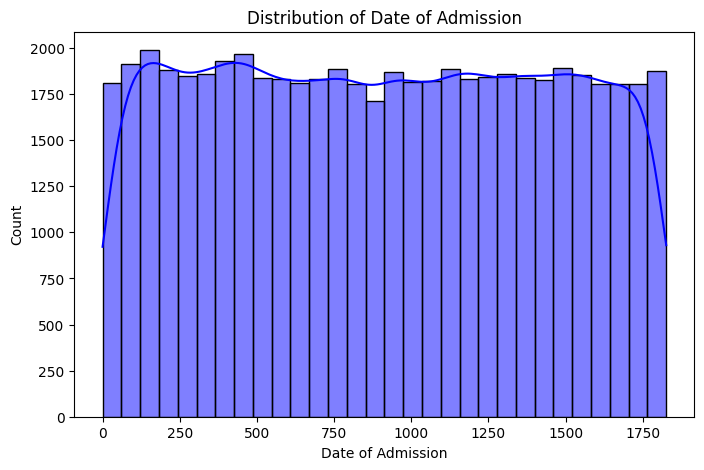

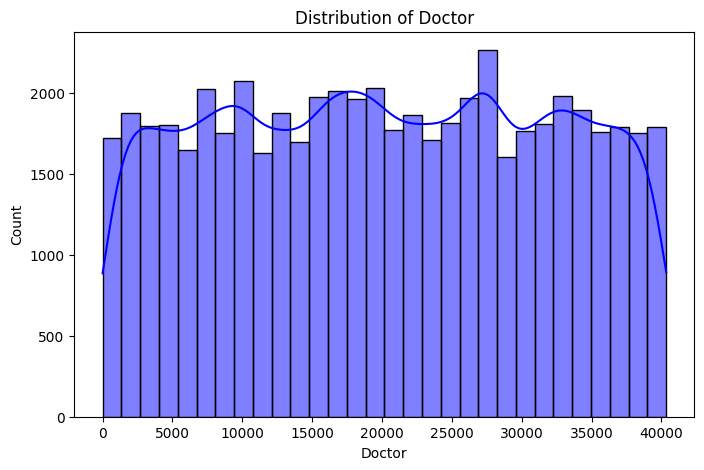

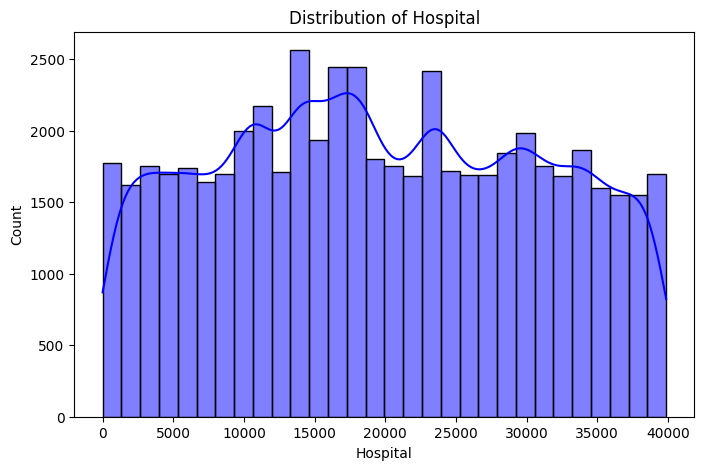

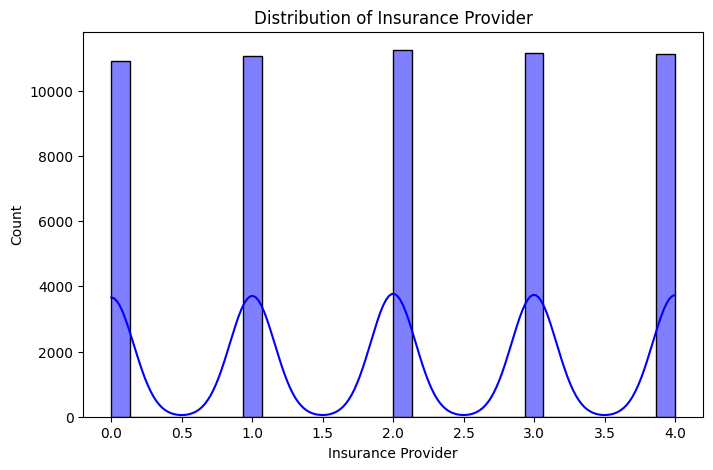

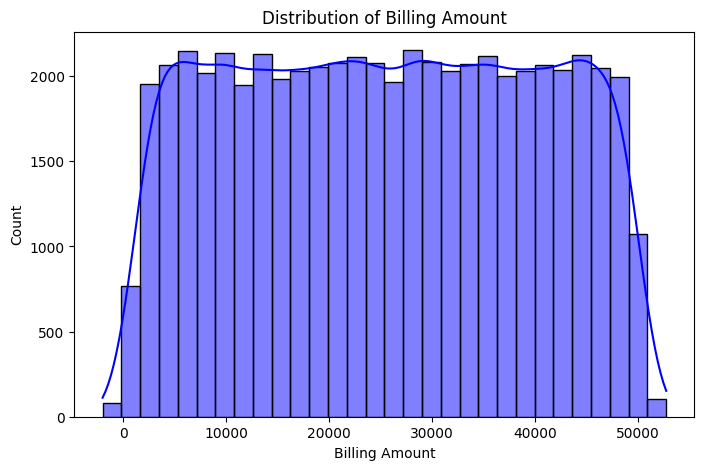

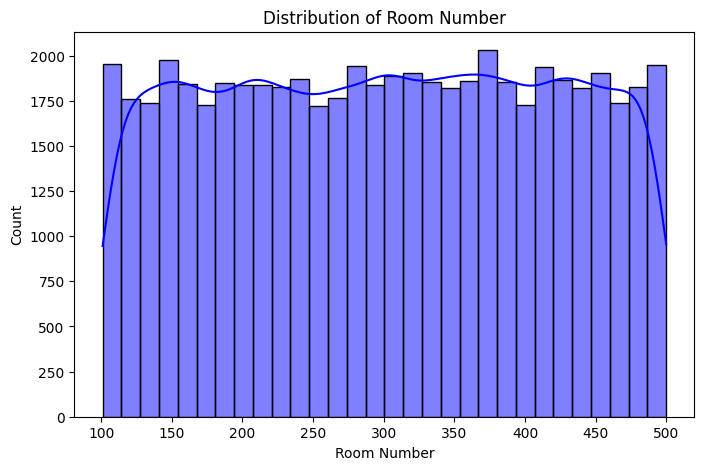

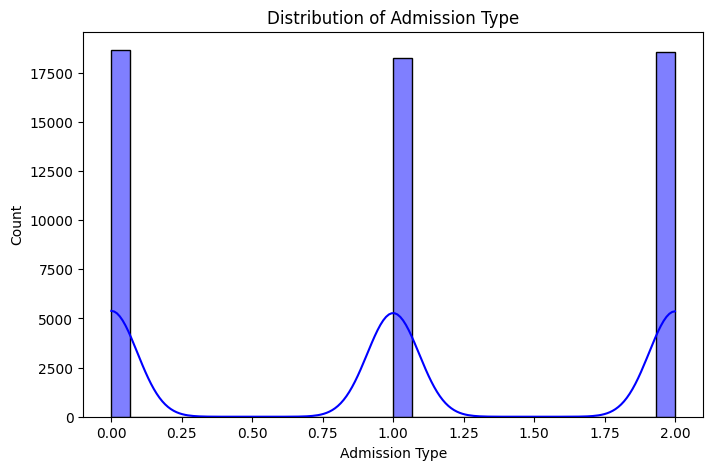

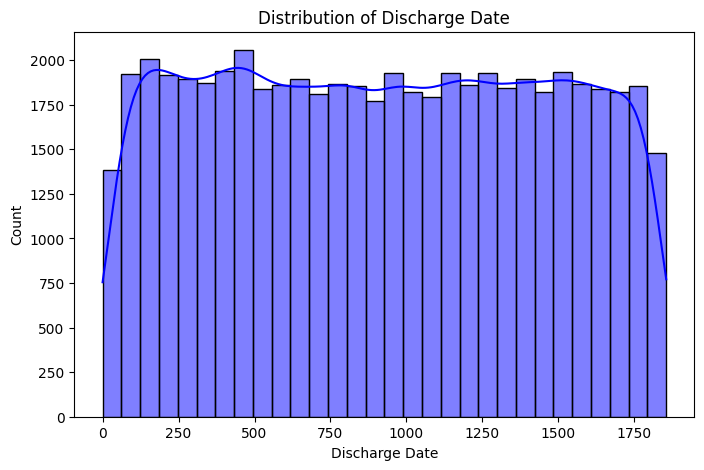

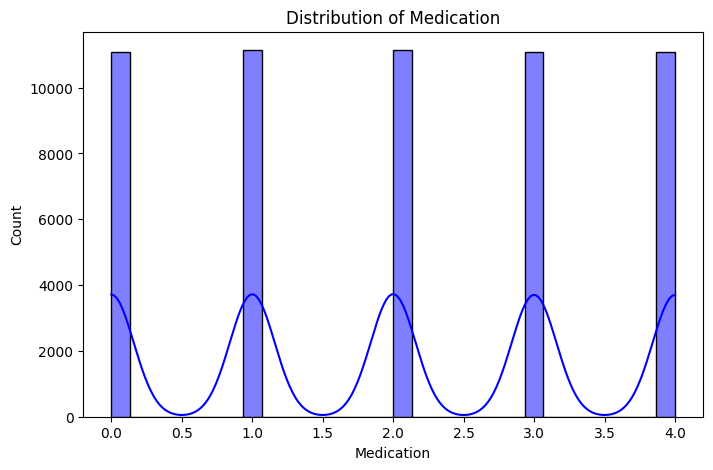

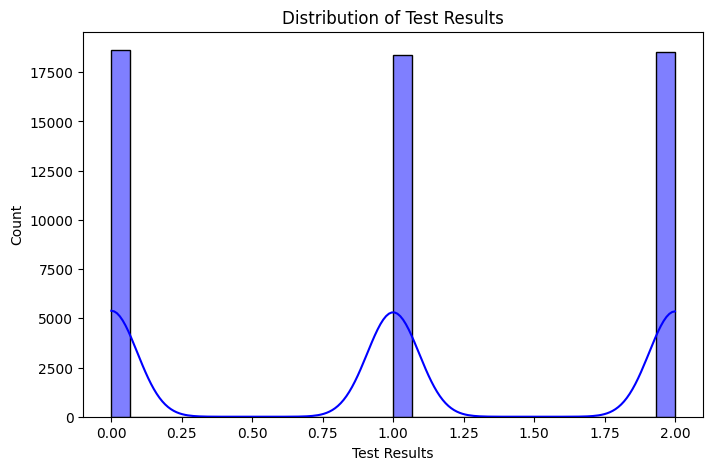

In [58]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms with KDE
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()


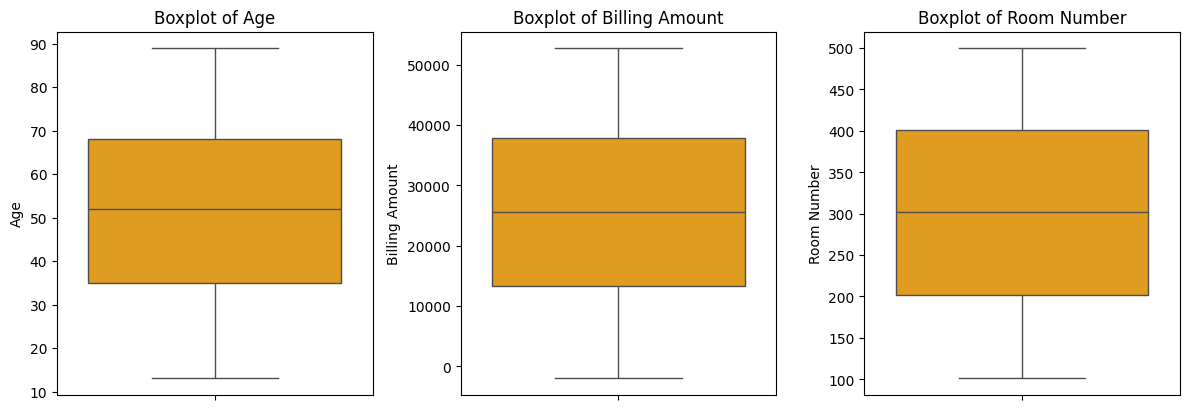

In [70]:
#  Boxplot for Numerical Columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=column, color='orange')
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


In [60]:
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method."""
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    z_scores = np.abs(stats.zscore(data[numeric_cols]))
    outliers = (z_scores > threshold).any(axis=1)
    return data[outliers]

# Find outliers using Z-score
outliers_z = detect_outliers_zscore(data)
print("Outliers detected using Z-score:")
print(outliers_z)


Outliers detected using Z-score:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


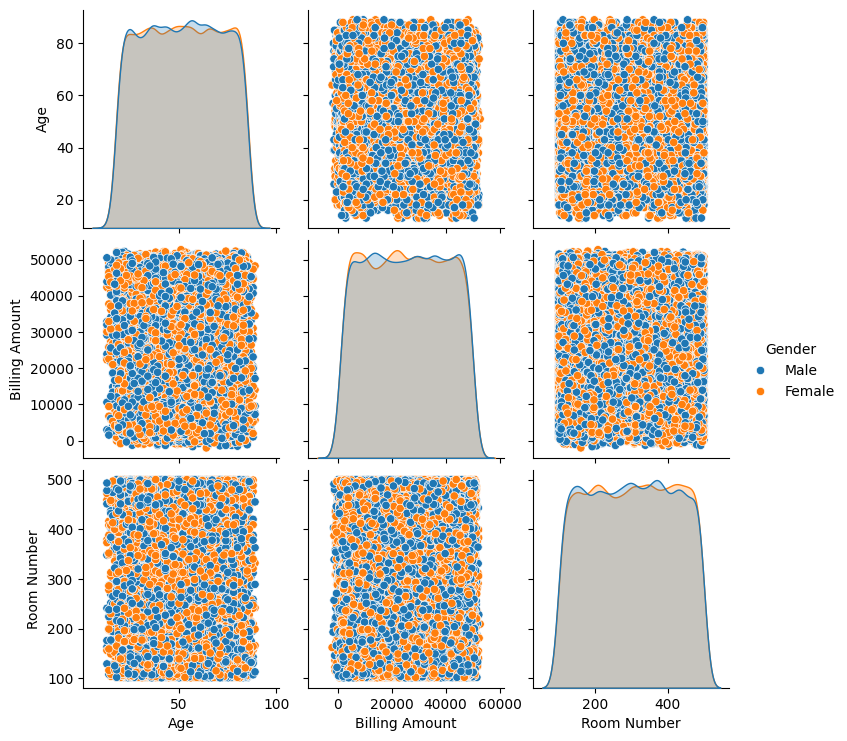

In [3]:
# Pair plot to visualize relationships
sns.pairplot(data, hue='Gender') 
plt.show()

In [43]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_cols)


Categorical Features: Index([], dtype='object')


In [19]:
#Label Encoding
label_encoder = LabelEncoder()
data_label_encoded = data.copy()

for column in categorical_columns:
    data_label_encoded[column] = label_encoder.fit_transform(data[column])

print("\nFirst 5 rows after label encoding:")
print(data_label_encoded.head())
# Verify encoding
print("\nOne-Hot Encoded Dataset Information:")
print(data_label_encoded.info())

print("\nLabel-Encoded Dataset Information:")
print(data_label_encoded.info())


Categorical Columns:
Index(['Name', 'Blood Type', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')

First 5 rows after label encoding:
    Name  Age  Gender  Blood Type  Date of Admission  Doctor  Hospital  \
0   3068   30       1           5               1729   26612     29933   
1  15211   62       1           0                104   33648     16012   
2   6476   76       0           1               1233   37828      5473   
3  26935   28       0           6                560   22511     12317   
4  26241   43       0           2               1230   21259     33598   

   Insurance Provider  Billing Amount  Room Number  Discharge Date  \
0                   1    18856.281306          328            1730   
1                   3    33643.327287          265             109   
2                   0    27955.096079          205            1247   
3                   3    37909.782410        

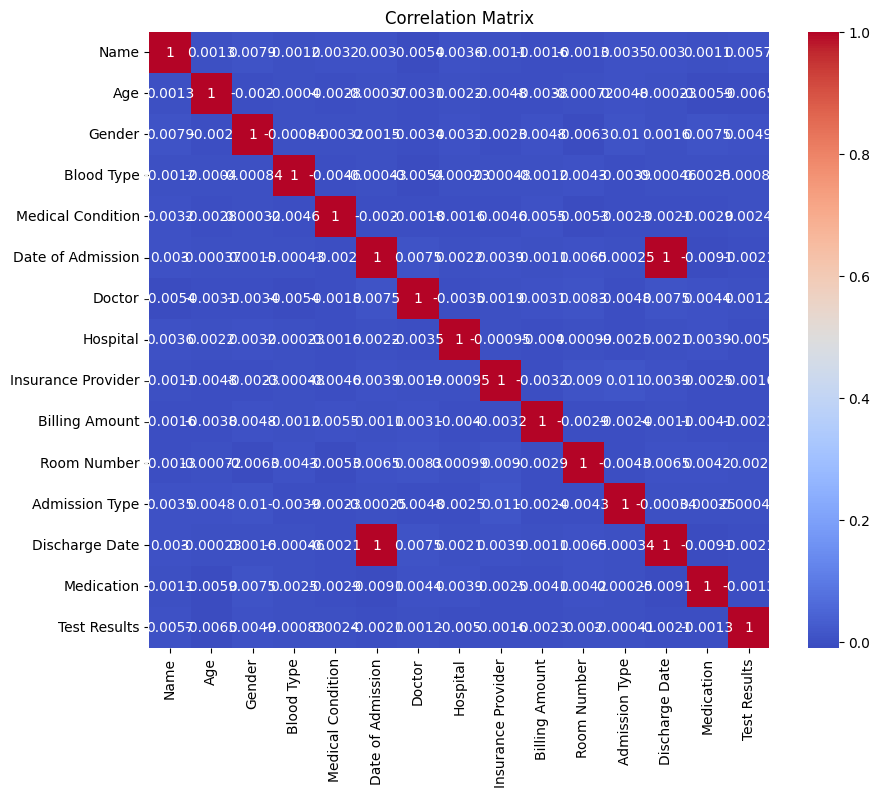


Highly correlated variable pairs:
('Date of Admission', 'Discharge Date')


In [69]:
# Calculate correlation matrix
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated pairs
threshold = 0.7
correlated_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((numeric_cols[i], numeric_cols[j]))

print("\nHighly correlated variable pairs:")
for pair in correlated_pairs:
    print(pair)